### functions

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
np.corrcoef([0,1], [0,2])
import islets
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

Managed to import cmovie from .movies
could not import load from anywhere.


to interact with plots run 
- `%matplotlib notebook`


alternatively
- `%matplotlib inline`

In [3]:
%matplotlib notebook

### Import pickle and massage

In [3]:
pathToRoi = "/data/Sandra/2020/2020_11_05/Experiment74b.lif_analysis/Series004-16/8.11_rois.pkl"
regions = islets.load_regions(pathToRoi)

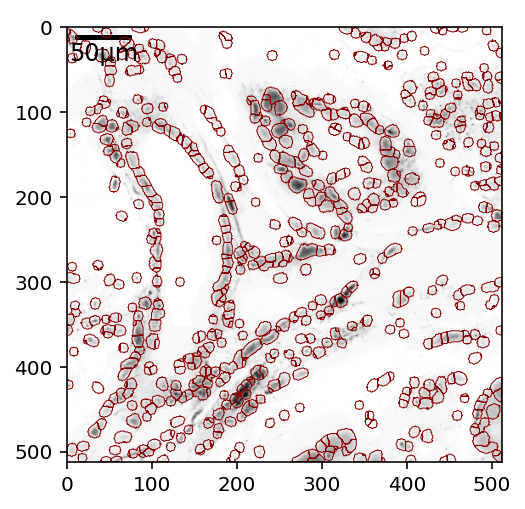

In [4]:
plt.figure()
regions.plotEdges()

### Massage ROIs (merge, discard...)
- using `regions.examine()` (easy but long, don't forget that you can discard and merge rois...)
- using some of the following example codes:

#### filter based on roi size

Your query size <= 10.000 returned 74 rois.


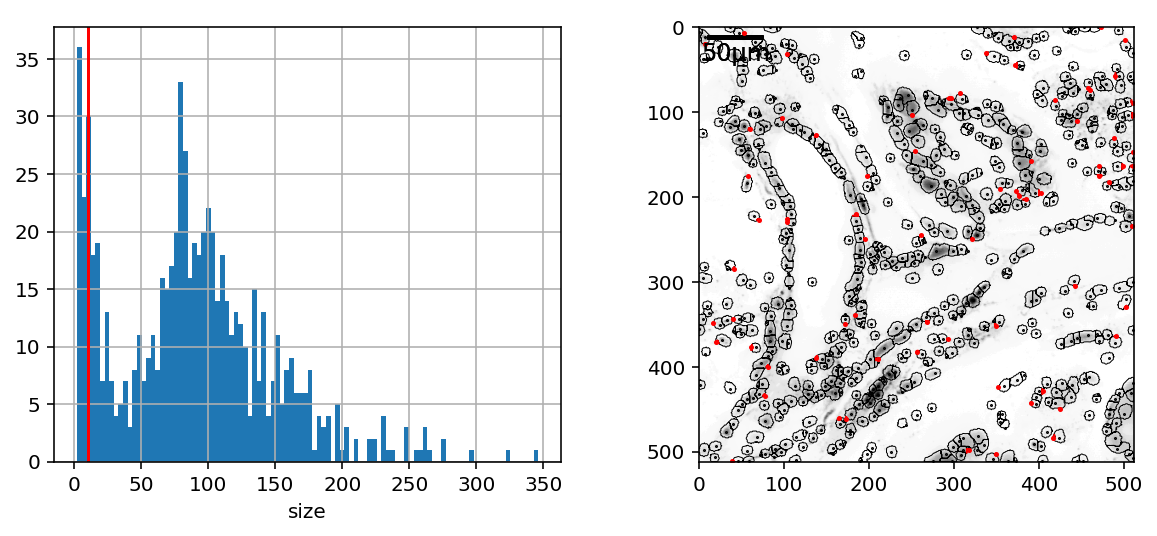

In [5]:
# Let's try to find rois with size smaller than some threshold
# A reasonable dumm guess is the 10th percentie
quantity = "size"
threshold = np.percentile(regions.df[quantity],10)
# If you have a better idea, and you should, uncomment the line 
# below and enter your idea:
# threshold = ....
queryString = f"{quantity} <= {threshold:.3f}"
currois = regions.df.query(queryString).index
print(f"Your query {queryString} returned {len(currois)} rois.")
if len(currois):
    fig, (ax,axr) = plt.subplots(1,2,figsize=(10,4))
    regions.df[quantity].hist(ax=ax, bins=100)
    ax.axvline(threshold,color="red")
    ax.set_xlabel(quantity)
    regions.plotEdges(ax=axr, color="k")
    regions.plotPeaks(ax=axr, color="k",ms=1)
    regions.plotEdges(ax=axr, image=False, ix=currois,color="r", spline=False)
    regions.plotPeaks(ax=axr, ix=currois,color="r")

If now you wish to delete them, feel free to run:
```
regions.df.drop(index=currois, inplace=True)
regions.update()
del currois
```
I do not wish to do that. I will try to merge them into their neighboring rois, where possible, and perhaps delete at a later point.

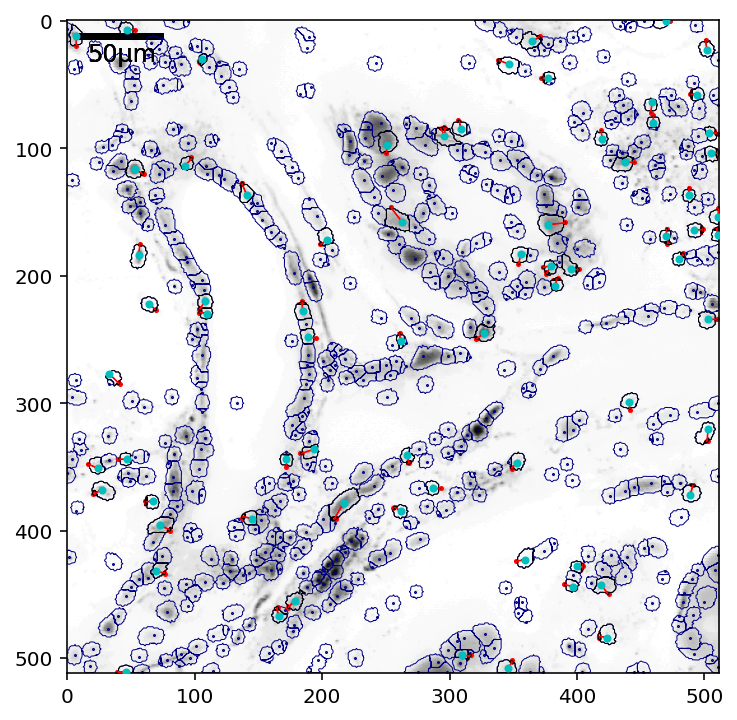

In [6]:
df = islets.utils.getPeak2BoundaryDF(regions.df, distTh=np.inf)
df = df[df.i.isin(currois)]
plt.figure(figsize=(6,6))
ax = plt.subplot(111)
# all existing rois will be in blue (navy)
regions.plotEdges(ax=ax, color="navy")
regions.plotPeaks(ax=ax, color="navy",ms=1)
# in red will be the interesting rois which are _not_ merged
regions.plotEdges(ax=ax, image=False, ix=currois,color="r", spline=False)
regions.plotPeaks(ax=ax, ix=currois,color="r")
# in black, with red arrows stemming from them, will be rois which 
# are selected to be merged to their cyan neighbors
G = islets.utils.getGraph_of_ROIs_to_Merge(df.iloc[:,:2],regions,plot=True,ax=ax)

In [7]:
# finally, merge
regions.mergeBasedOnGraph(G,verbose=True)

74 subsumed into existing ROIs.


74

I will now repeat the same code from above

Your query size <= 25.000 returned 68 rois.


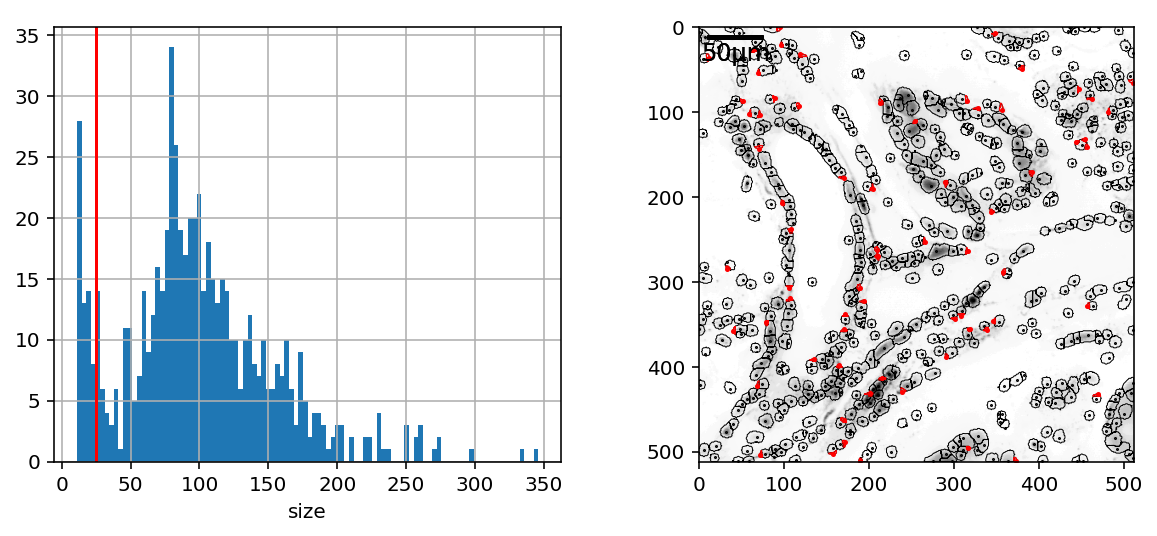

In [8]:
# Let's try to find rois with size smaller than some threshold
# A reasonable dumm guess is the 10th percentie
quantity = "size"
threshold = np.percentile(regions.df[quantity],10)
# If you have a better idea, and you should, uncomment the line 
# below and enter your idea:
# threshold = ....
queryString = f"{quantity} <= {threshold:.3f}"
currois = regions.df.query(queryString).index
print(f"Your query {queryString} returned {len(currois)} rois.")
if len(currois):
    fig, (ax,axr) = plt.subplots(1,2,figsize=(10,4))
    regions.df[quantity].hist(ax=ax, bins=100)
    ax.axvline(threshold,color="red")
    ax.set_xlabel(quantity)
    regions.plotEdges(ax=axr, color="k")
    regions.plotPeaks(ax=axr, color="k",ms=1)
    regions.plotEdges(ax=axr, image=False, ix=currois,color="r", spline=False)
    regions.plotPeaks(ax=axr, ix=currois,color="r")

Before deleting them, I wish to have a look

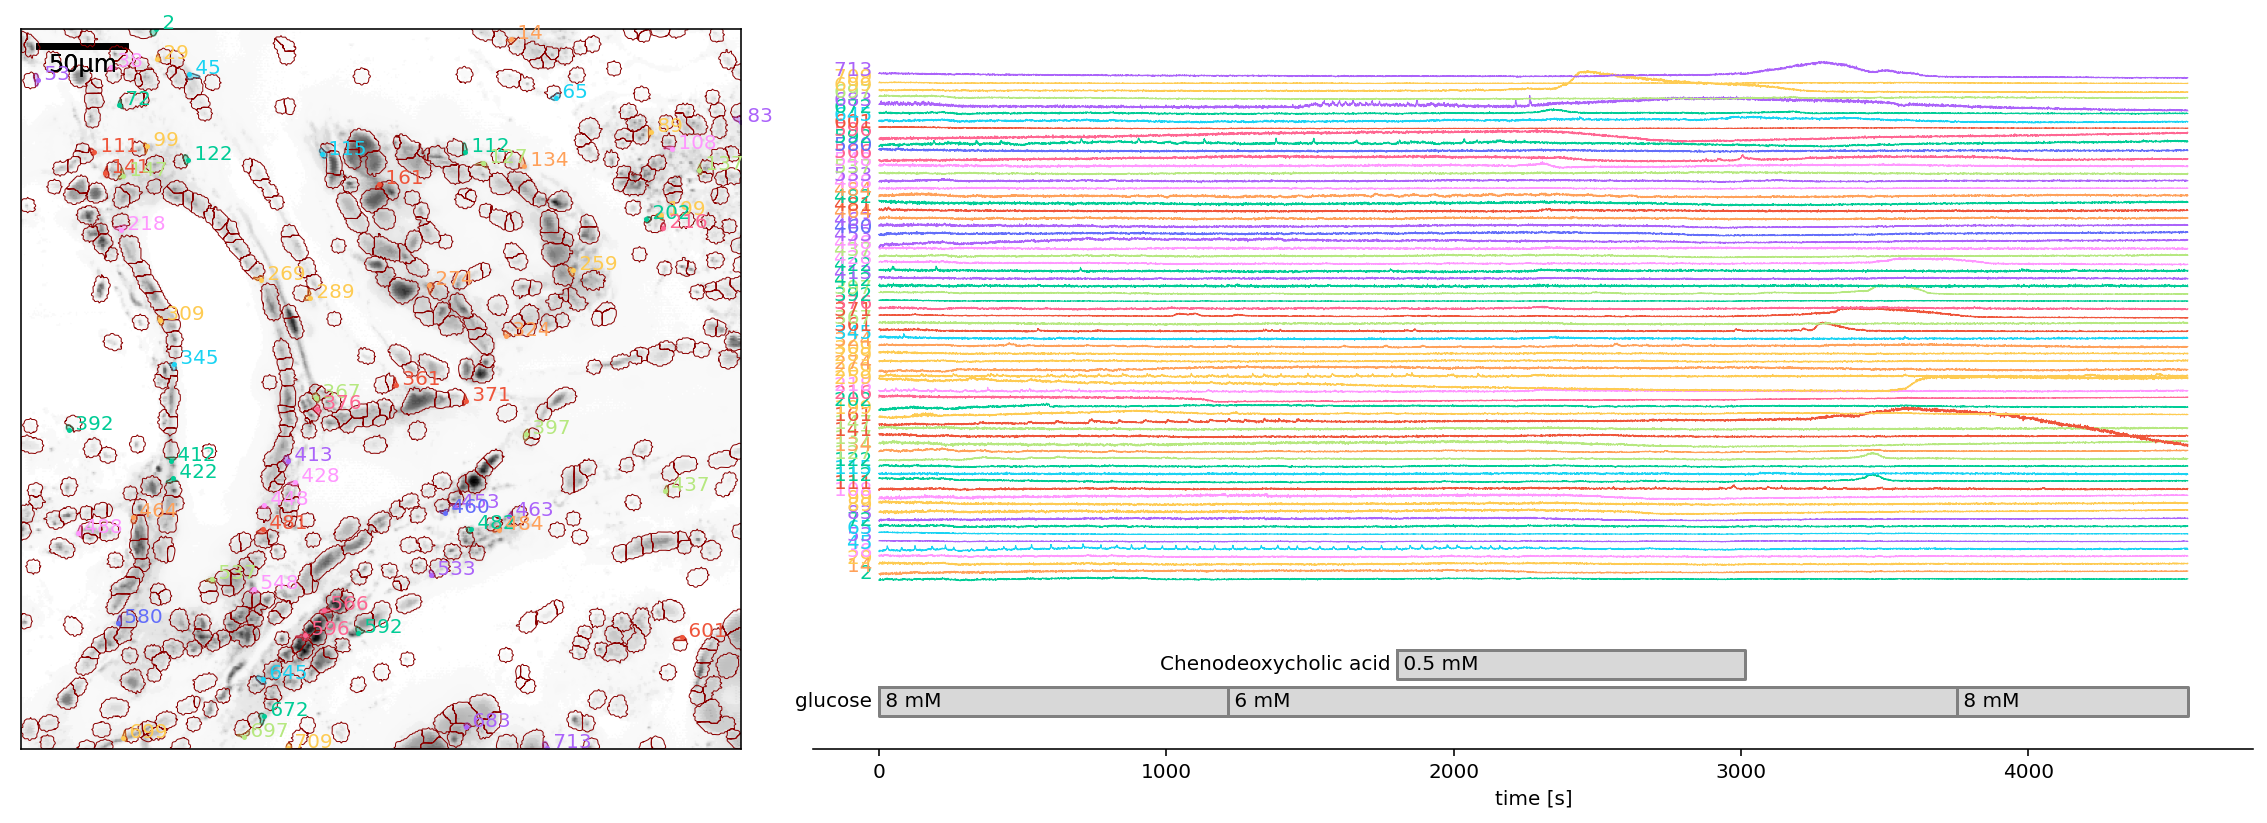

In [9]:
regions.plotTraces(currois)

I conclude there are too many good traces here to remove them all in bulk. I could go back to examiner to remove some by hand. For that I'd run `regions.examine(startShow=currois)`.

#### filter based on (local and global) brightness
Rois are constructed by aggregating pixels around local peak of intensity. This is performed on an image which represents a statistic of an original movie (say a mean, or a max) that is spatially filtered to remove a "background". The values of these local peaks is saveg in a column called `peakValue`.

Your query peakValue <= 0.094 returned 63 rois.


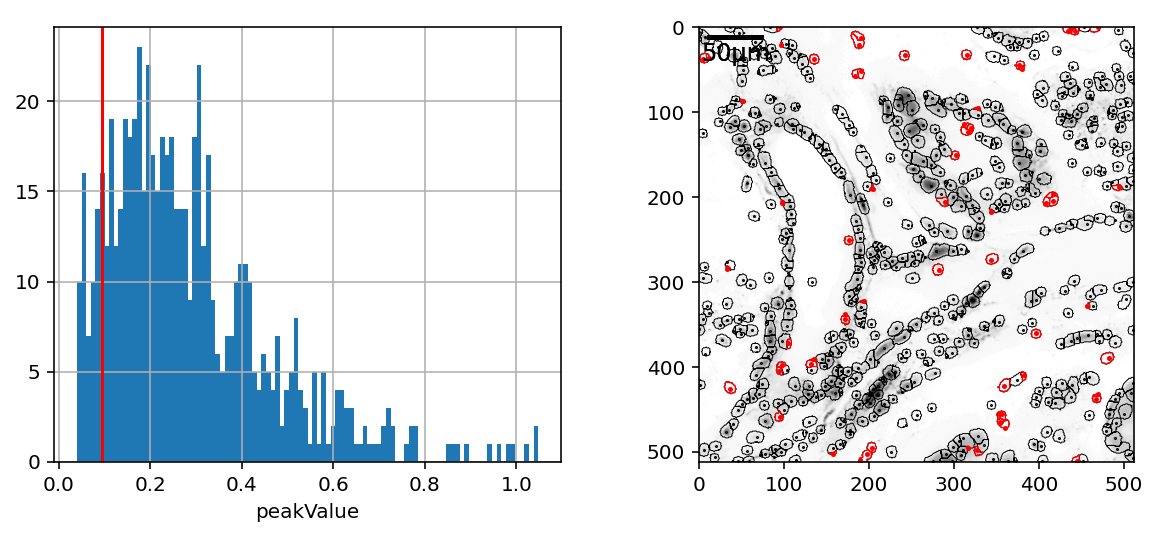

In [10]:
# Let's try to find rois with peakValue smaller than some threshold
# A reasonable dumm guess is the 10th percentie
quantity = "peakValue"
threshold = np.percentile(regions.df[quantity],10)
# If you have a better idea, and you should, uncomment the line 
# below and enter your idea:
# threshold = ....

queryString = f"{quantity} <= {threshold:.3f}"
currois = regions.df.query(queryString).index
print(f"Your query {queryString} returned {len(currois)} rois.")
if len(currois):
    fig, (ax,axr) = plt.subplots(1,2,figsize=(10,4))
    regions.df[quantity].hist(ax=ax, bins=100)
    ax.axvline(threshold,color="red")
    ax.set_xlabel(quantity)
    regions.plotEdges(ax=axr, color="k")
    regions.plotPeaks(ax=axr, color="k",ms=1)
    regions.plotEdges(ax=axr, image=False, ix=currois,color="r", spline=False)
    regions.plotPeaks(ax=axr, ix=currois,color="r")

Again, I would now run `regions.examine(startShow=currois)` to make sure I don't delete something actually important.

You can also reassign the `peakValue` to a movie statistic which is unfilterred in space. The `regions` object contains `statImages` dictionary with the following keys:

In [11]:
regions.statImages.keys()

dict_keys(['mean', 'std', 'highperc', 'highperc+mean'])

So we can reassign peaks to, say, `'mean'`. This will make `peakValue` have values which are mean of that particular pixel over time. 

I sometimes like to go for `highperc`, which is essentially a maximal value this pixels assumes in time (it is actually 10th largest, or "high percentile", which is just a robust version of the maximum, to guard agains outliers).

In [12]:
regions.reassign_peaks(regions.statImages["mean"])

The same code from above now produces obvious outliers

Your query peakValue <= 0.679 returned 65 rois.


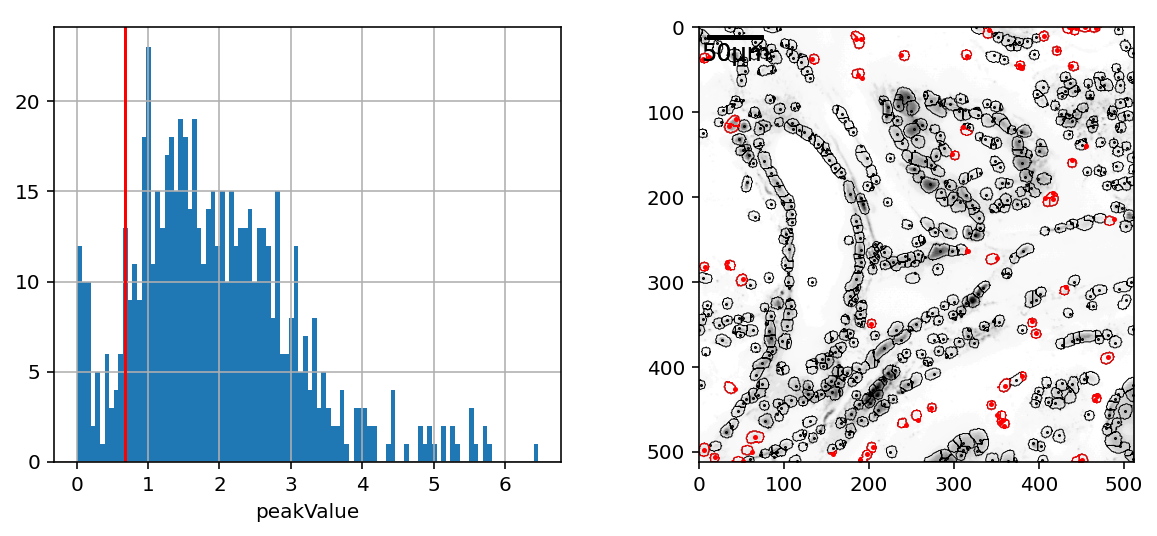

In [13]:
# Let's try to find rois with peakValue smaller than some threshold
# A reasonable dumm guess is the 10th percentie
quantity = "peakValue"
threshold = np.percentile(regions.df[quantity],10)
# If you have a better idea, and you should, uncomment the line 
# below and enter your idea:
# threshold = ...

queryString = f"{quantity} <= {threshold:.3f}"
currois = regions.df.query(queryString).index
print(f"Your query {queryString} returned {len(currois)} rois.")
if len(currois):
    fig, (ax,axr) = plt.subplots(1,2,figsize=(10,4))
    regions.df[quantity].hist(ax=ax, bins=100)
    ax.axvline(threshold,color="red")
    ax.set_xlabel(quantity)
    regions.plotEdges(ax=axr, color="k")
    regions.plotPeaks(ax=axr, color="k",ms=1)
    regions.plotEdges(ax=axr, image=False, ix=currois,color="r", spline=False)
    regions.plotPeaks(ax=axr, ix=currois,color="r")

In [ ]:
# I wish to examine them more closely:
regions.examine(startShow=currois)

I think these are actually all worth dropping, so I run:

In [14]:
regions.df.drop(index=currois, inplace=True)
regions.update()
del currois

#### filter based on 'activity'

Another way to help you make decisions is to look at the rois' "activity", at several timescales. It is an averate time the trace spends "active" for a given timescale. For several timescales, it is an average of averages.

In [16]:
regions.get_activity([10,100])

Your query activity <= 0.021 returned 57 rois.


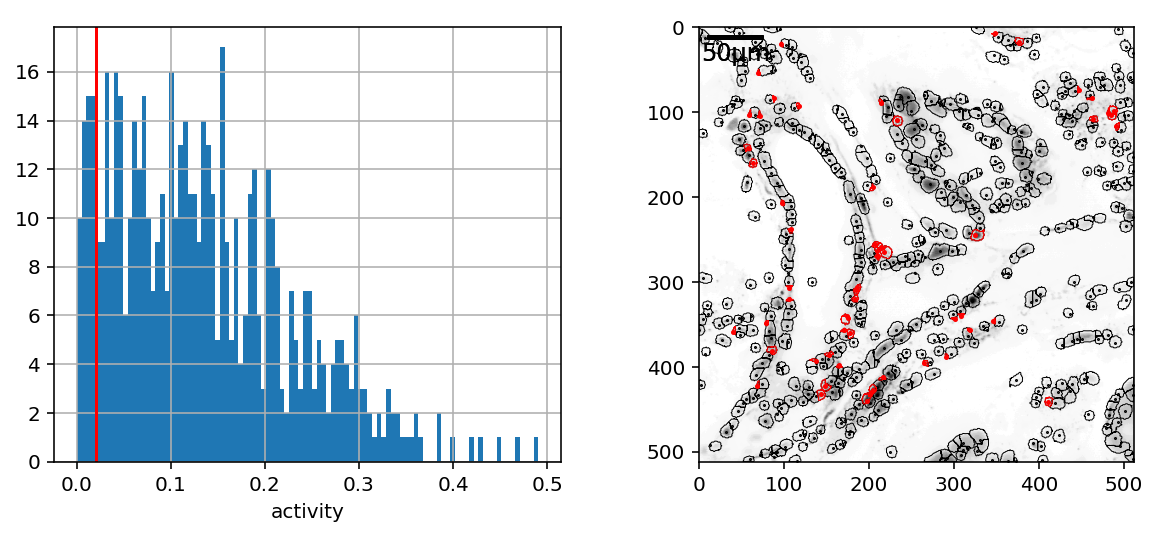

In [17]:
# Let's try to find rois with peakValue smaller than some threshold
# A reasonable dumm guess is the 10th percentie
quantity = "activity"
threshold = np.percentile(regions.df[quantity],10)
# If you have a better idea, and you should, uncomment the line 
# below and enter your idea:
# threshold = ....

queryString = f"{quantity} <= {threshold:.3f}"
currois = regions.df.query(queryString).index
print(f"Your query {queryString} returned {len(currois)} rois.")
if len(currois):
    fig, (ax,axr) = plt.subplots(1,2,figsize=(10,4))
    regions.df[quantity].hist(ax=ax, bins=100)
    ax.axvline(threshold,color="red")
    ax.set_xlabel(quantity)
    regions.plotEdges(ax=axr, color="k")
    regions.plotPeaks(ax=axr, color="k",ms=1)
    regions.plotEdges(ax=axr, image=False, ix=currois,color="r", spline=False)
    regions.plotPeaks(ax=axr, ix=currois,color="r")

I don't see obvious outliers here, and will just continue. Often, you can see here some clear outliers which you would want to eliminate. I always suggest `regions.examine(startShow=currois)` just to make sure.

We can also save activity at different timescales with different names and use them afterwards. For example:
```
regions.get_activity(10, saveAs="activity_10")
```
will save it as a separate quantity called `activity_10`

The following code will go through the given timescales, and for each define the activity, save it under a different name and specify roi colors based on that quantity. The colors defined thought the function `regions.color_according_to(...)` also show up in the examiner. If you want to rever to default colors, delete the color column from the regions dataframe:
```
del regions.df.["color"]
```

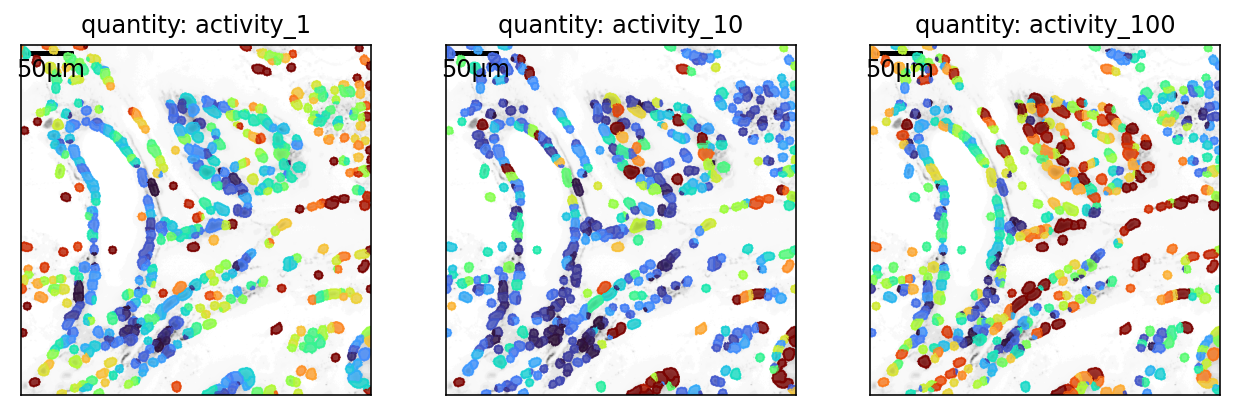

In [23]:
timescales = [1,10,100]
fig, axs = plt.subplots(1,len(timescales),figsize=(3*len(timescales),3), sharex=True, sharey=True)
for ts,ax in zip(timescales,axs):
    quantity = "activity_%g"%ts
    regions.get_activity(timescale=ts, saveAs=quantity)
    ax.set_title(f"quantity: {quantity}")
    regions.color_according_to(quantity)
    regions.plotEdges(ax=ax, separate=True,fill=True,)
    ax.set_xticks([])
    ax.set_yticks([])
plt.subplots_adjust(wspace=.03)
plt.tight_layout()

This view may help us select/deselect cells. E.g. a cell that is always blue is probably worth discarding.

#### filter based on two quantities 

Your query activity_100<=0.05772367925712135 or activity_10<=0.034337449933244335 returned 92 rois.


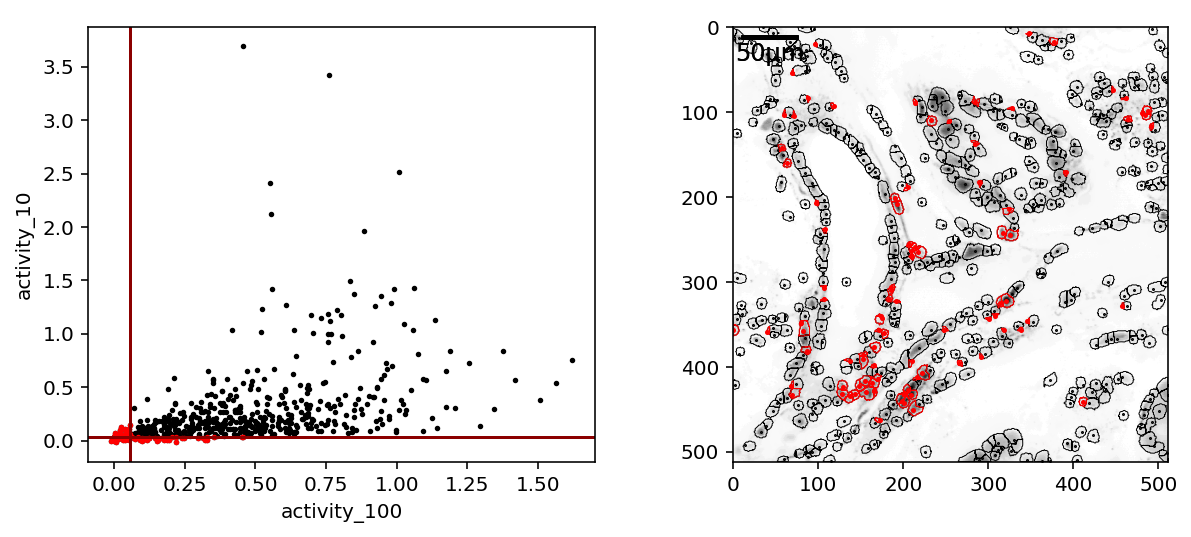

In [24]:
quantityX = "activity_100"
quantityY = "activity_10"

# a possible values for thresholds
thresholdX = np.percentile(regions.df[quantityX],10)
thresholdY = np.percentile(regions.df[quantityY],10)

# If you have a better idea for thresholds, and you should, uncomment a line 
# below and enter your idea:
# thresholdX = ...
# thresholdY = ...

queryString = f"{quantityX}<={thresholdX} or {quantityY}<={thresholdY}"  # instead of "or" you can choose to use "and" and vice versa
currois = regions.df.query(queryString).index
print(f"Your query {queryString} returned {len(currois)} rois.")
if len(currois):
    fig, (ax,axr) = plt.subplots(1,2,figsize=(10,4))
    regions.df.plot.scatter(x=quantityX,y=quantityY,c="black", ax=ax, s=3)
    regions.df.loc[currois].plot.scatter(x=quantityX,y=quantityY,c="red", ax=ax, s=3)
    ax.axvline(thresholdX,color="darkred")
    ax.axhline(thresholdY,color="darkred")
    regions.plotEdges(ax=axr, color="k")
    regions.plotPeaks(ax=axr, color="k",ms=1)
    regions.plotEdges(ax=axr, image=False, ix=currois,color="r", spline=False)
    regions.plotPeaks(ax=axr, ix=currois,color="r")


another example you asked about where we filter for rois which are active at 10s and __not__ active at 100s

Your query activity_100<0.875 and activity_10>0.354 returned 81 rois.


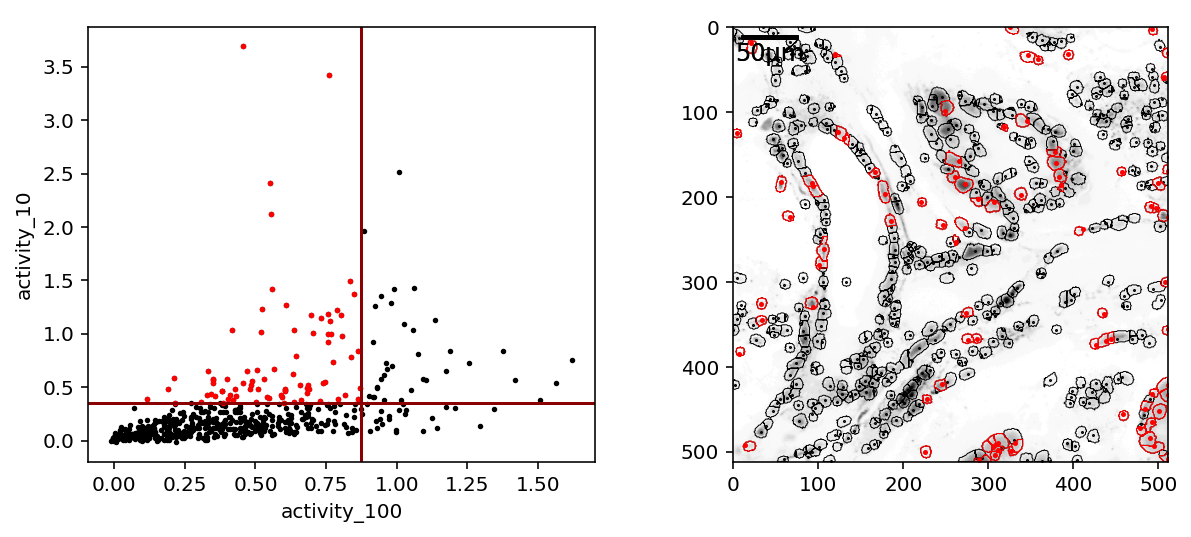

In [25]:
quantityX = "activity_100"
quantityY = "activity_10"

# a possible values for thresholds
thresholdX = np.percentile(regions.df[quantityX],90)
thresholdY = np.percentile(regions.df[quantityY],80)

# If you have a better idea for thresholds, and you should, uncomment a line 
# below and enter your idea:
# thresholdX = ...
# thresholdY = ...

queryString = f"{quantityX}<{thresholdX:.3f} and {quantityY}>{thresholdY:.3f}"  # instead of "or" you can choose to use "and" and vice versa
currois = regions.df.query(queryString).index
print(f"Your query {queryString} returned {len(currois)} rois.")
if len(currois):
    fig, (ax,axr) = plt.subplots(1,2,figsize=(10,4))
    regions.df.plot.scatter(x=quantityX,y=quantityY,c="black", ax=ax, s=3)
    regions.df.loc[currois].plot.scatter(x=quantityX,y=quantityY,c="red", ax=ax, s=3)
    ax.axvline(thresholdX,color="darkred")
    ax.axhline(thresholdY,color="darkred")
    regions.plotEdges(ax=axr, color="k")
    regions.plotPeaks(ax=axr, color="k",ms=1)
    regions.plotEdges(ax=axr, image=False, ix=currois,color="r", spline=False)
    regions.plotPeaks(ax=axr, ix=currois,color="r")


Sometimes, you can see the outliers well in this view. In that case, you can either merge them, or drop them...

#### A more advanced example of restricting the activity calculation to certain time frame

I have a look at the protocol to see when changes happen, and realize I want to obtain activity, for transients (events) upon filtering at timescale of 10s, for the time window when then Chenodeoxycholic acid is applied.

In [15]:
regions.protocol.sort_values(["t_begin","t_end"])

compound concentration  begin    end  t_begin        t_end
0                glucose          8 mM    NaN  20:14      0.0  1214.000000
1                glucose          6 mM  20:14  62:34   1214.0  3754.000000
3  Chenodeoxycholic acid        0.5 mM  30:02  50:16   1802.0  3016.000000
2                glucose          8 mM  62:34    NaN   3754.0  4556.111111

In [16]:
regions.get_activity(timescale=10, timeframe=(2000,3000), saveAs="activity_10_cheno")

Your query activity_10_cheno > 0.011 returned 54 rois.


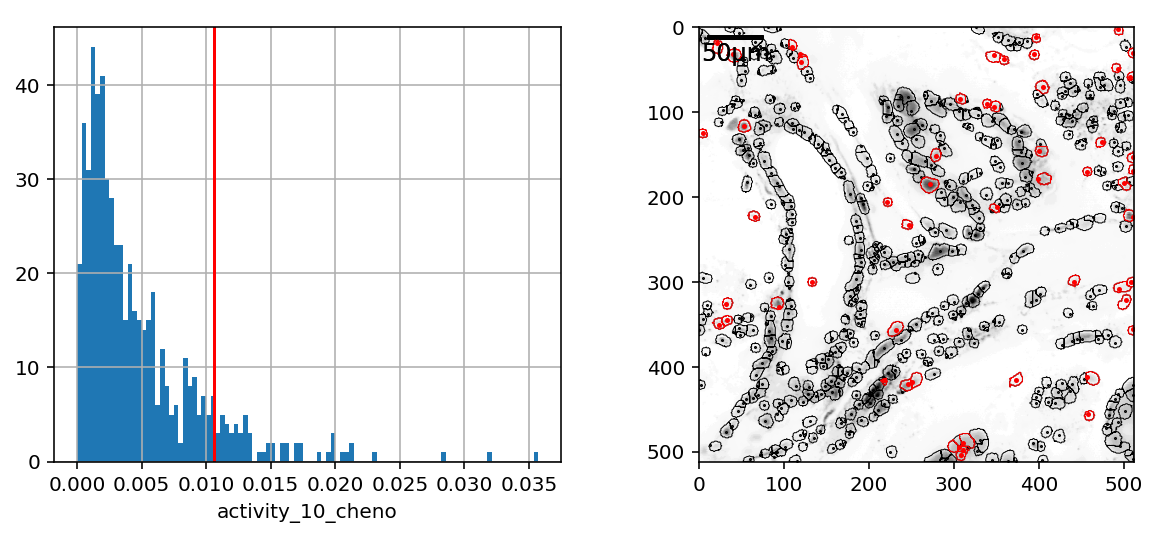

In [17]:
# So, let's filter for cells which are in the top 10th decile according to this quantity
quantity = "activity_10_cheno"
threshold = np.percentile(regions.df[quantity],90)
# If you have a better idea, uncomment the line 
# below and enter your idea:
# threshold = ...

queryString = f"{quantity} > {threshold:.3f}"
currois = regions.df.query(queryString).index
print(f"Your query {queryString} returned {len(currois)} rois.")
if len(currois):
    fig, (ax,axr) = plt.subplots(1,2,figsize=(10,4))
    regions.df[quantity].hist(ax=ax, bins=100)
    ax.axvline(threshold,color="red")
    ax.set_xlabel(quantity)
    regions.plotEdges(ax=axr, color="k")
    regions.plotPeaks(ax=axr, color="k",ms=1)
    regions.plotEdges(ax=axr, image=False, ix=currois,color="r", spline=False)
    regions.plotPeaks(ax=axr, ix=currois,color="r")

Don't forget to specify a unique name for the quantity to save, otherwise it will be saved as `"acitiviy"`, and will overwrite it in case it exists.  
Also, try not use spaces and special characters (` `,`-`,`(`,`)`,`#`,`$`,`@`,`#`,...) in the quantity name. It is technically allowed, but then you can't use my simple code snippets to filter for rois.

### Save

In [36]:
saveDirectory, orig_filename = os.path.split(pathToRoi)
orig_filename = os.path.splitext(orig_filename)[0]
orig_filename = orig_filename.split("_rois")[0]
saveFilename = orig_filename+"_srdjan"

For the purposes of speed, I will save only every 10th roi.

In [21]:
regions.df = regions.df[::10].copy()
regions.update()

In [20]:
%matplotlib inline

In [21]:
islets.utils.saveRois(regions, outDir=saveDirectory, filename=saveFilename, add_date=True)